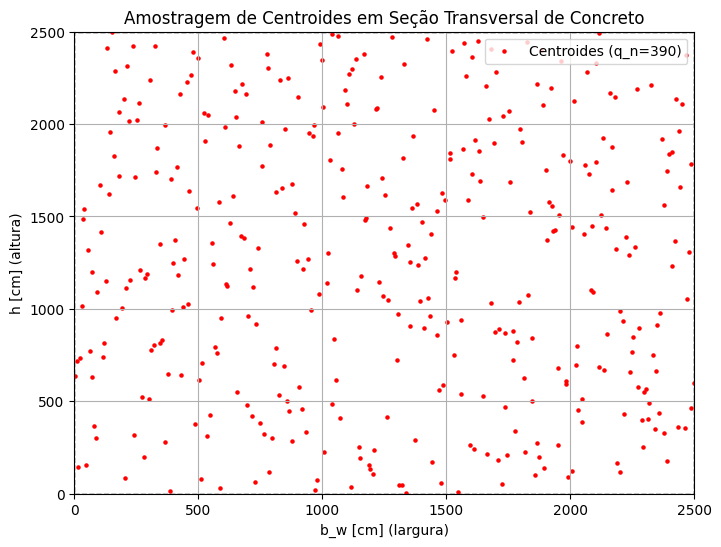

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import qmc

# === Par√¢metros de entrada ===
q_n = 390            # Quantidade de pontos (centroides)
b_w_max = 2500       # Largura m√°xima da se√ß√£o em cm (eixo x)
h_max = 2500         # Altura m√°xima da se√ß√£o em cm (eixo y)

# === Gera√ß√£o dos pontos via Amostragem por Hipercubo Latino ===
sampler = qmc.LatinHypercube(d=2)
sample = sampler.random(n=q_n)

# Escalando os pontos para o dom√≠nio da se√ß√£o de concreto
scaled_sample = qmc.scale(sample, l_bounds=[0, 0], u_bounds=[b_w_max, h_max])

# Separando coordenadas x (largura) e y (altura)
x_centroids = scaled_sample[:, 0]
y_centroids = scaled_sample[:, 1]

# === Plotagem ===
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Amostragem de Centroides em Se√ß√£o Transversal de Concreto')
ax.set_xlabel('b_w [cm] (largura)')
ax.set_ylabel('h [cm] (altura)')
ax.set_xlim(0, b_w_max)
ax.set_ylim(0, h_max)

# Ret√¢ngulo da se√ß√£o
ax.add_patch(plt.Rectangle((0, 0), b_w_max, h_max, fill=False, edgecolor='black', linestyle='--'))

# Plotando os pontos em vermelho
ax.scatter(x_centroids, y_centroids, color='red', s=5, label=f'Centroides (q_n={q_n})')
ax.legend(loc="upper right")

plt.grid(True)
plt.show()


Os contornos se cruzam.


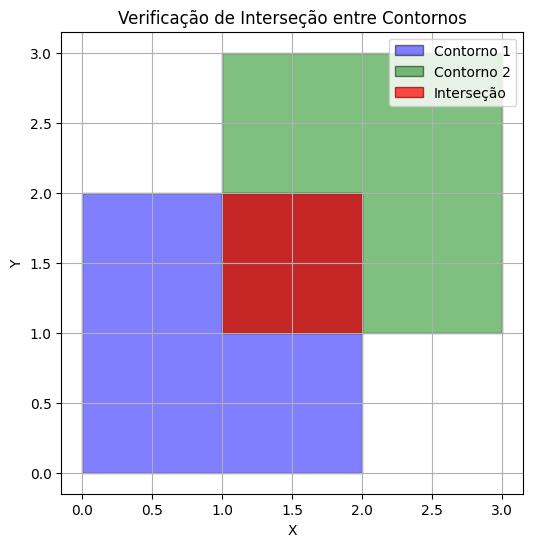

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.plotting import plot_polygon

# === Defini√ß√£o dos contornos ===
contorno_1 = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])        # Quadrado inferior esquerdo
contorno_2 = Polygon([(1, 1), (3, 1), (3, 3), (1, 3)])        # Quadrado superior direito, interceptando o primeiro

# === Verifica√ß√£o de interse√ß√£o ===
if contorno_1.intersects(contorno_2):
    print("Os contornos se cruzam.")
else:
    print("N√£o h√° interse√ß√£o.")

# === Plotagem ===
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Verifica√ß√£o de Interse√ß√£o entre Contornos")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_aspect("equal")

# Contorno 1 - azul
x1, y1 = contorno_1.exterior.xy
ax.fill(x1, y1, alpha=0.5, fc='blue', ec='black', label='Contorno 1')

# Contorno 2 - verde
x2, y2 = contorno_2.exterior.xy
ax.fill(x2, y2, alpha=0.5, fc='green', ec='black', label='Contorno 2')

# Interse√ß√£o - vermelho
if existe_intersecao:
    if intersecao.geom_type == 'Polygon':
        xi, yi = intersecao.exterior.xy
        ax.fill(xi, yi, alpha=0.7, fc='red', ec='darkred', label='Interse√ß√£o')
    else:
        # Exibe apenas os pontos/linhas, caso n√£o seja um pol√≠gono
        ax.plot(*intersecao.xy, 'ro', label='Interse√ß√£o (n√£o poligonal)')

# Configura√ß√µes finais
ax.legend(loc='upper right')
ax.grid(True)
plt.show()


‚úÖ N√£o h√° interse√ß√£o.


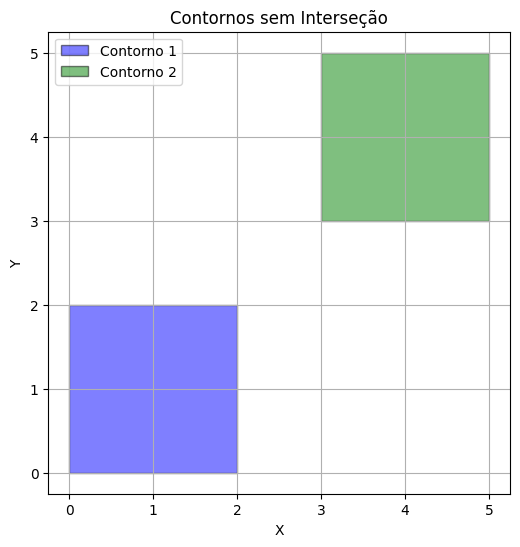

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# === Definindo dois pol√≠gonos que N√ÉO se cruzam ===
contorno_1 = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])         # Quadrado inferior esquerdo
contorno_2 = Polygon([(3, 3), (5, 3), (5, 5), (3, 5)])         # Quadrado superior direito, fora da √°rea do primeiro

# === Verifica√ß√£o ===
intersecao = contorno_1.intersection(contorno_2)

if intersecao.is_empty:
    print("‚úÖ N√£o h√° interse√ß√£o.")
else:
    print("‚ùå H√° interse√ß√£o:", intersecao)

# === Visualiza√ß√£o ===
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Contornos sem Interse√ß√£o")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_aspect("equal")

# Pol√≠gonos
x1, y1 = contorno_1.exterior.xy
x2, y2 = contorno_2.exterior.xy

ax.fill(x1, y1, alpha=0.5, fc='blue', ec='black', label='Contorno 1')
ax.fill(x2, y2, alpha=0.5, fc='green', ec='black', label='Contorno 2')

ax.legend()
ax.grid(True)
plt.show()


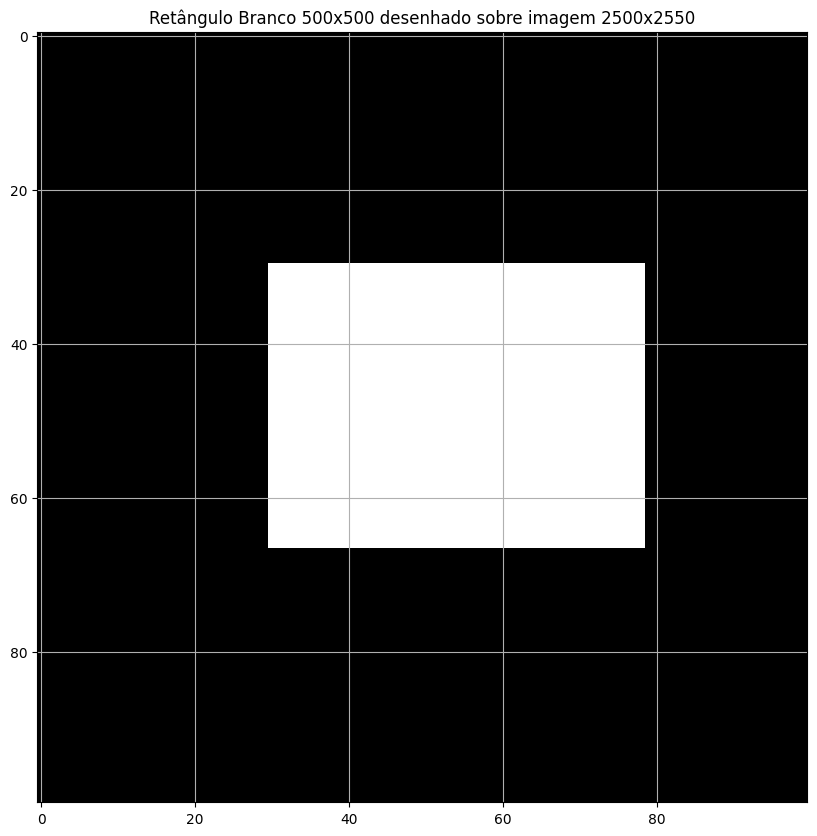

Coordenadas dos v√©rtices do ret√¢ngulo (em pixels):
V1: (30, 30)
V2: (78, 30)
V3: (78, 66)
V4: (30, 66)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# === Etapa 1: Criar imagem base ===
largura_img, altura_img = 100, 100
img = Image.new('L', (largura_img, altura_img), color=0)  # Fundo preto
draw = ImageDraw.Draw(img)

# === Etapa 2: Definir ret√¢ngulo 500x500 ===
largura_ret, altura_ret = 48, 36

# üìå Defina a posi√ß√£o onde o canto superior esquerdo do ret√¢ngulo ser√° desenhado
x_sup_esq = 30
y_sup_esq = 30

# Coordenadas do ret√¢ngulo (4 v√©rtices no sentido hor√°rio)
retangulo_coords = [
    (x_sup_esq, y_sup_esq),  # superior esquerdo
    (x_sup_esq + largura_ret, y_sup_esq),  # superior direito
    (x_sup_esq + largura_ret, y_sup_esq + altura_ret),  # inferior direito
    (x_sup_esq, y_sup_esq + altura_ret)  # inferior esquerdo
]

# === Etapa 3: Desenhar o ret√¢ngulo branco ===
draw.polygon(retangulo_coords, outline=255, fill=255)

# === Etapa 4: Converter para array e visualizar ===
matriz = np.array(img)

plt.figure(figsize=(10, 10))
plt.imshow(matriz, cmap='gray')
plt.title("Ret√¢ngulo Branco 500x500 desenhado sobre imagem 2500x2550")
plt.axis('on')
plt.grid(True)
plt.show()

# === Etapa 5: Imprimir coordenadas dos v√©rtices ===
print("Coordenadas dos v√©rtices do ret√¢ngulo (em pixels):")
for i, coord in enumerate(retangulo_coords):
    print(f"V{i+1}: {coord}")


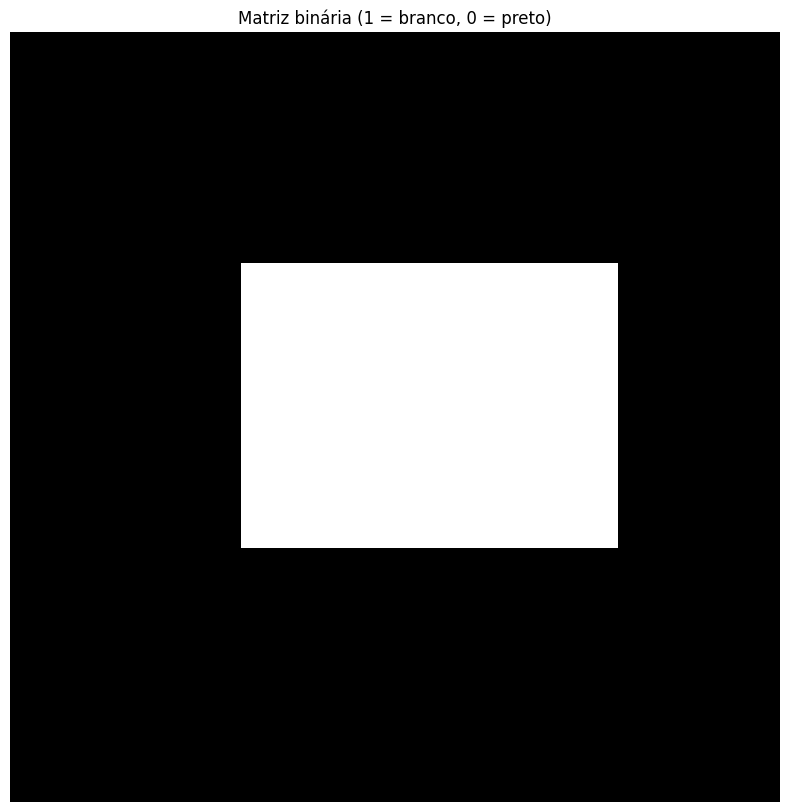

Dimens√µes da matriz: (100, 100)
Total de pixels brancos (valor 1): 1813


In [ ]:
# === Etapa 6: Criar matriz bin√°ria com 1 onde √© branco ===
matriz_binaria = (matriz == 255).astype(int)

# Exibir visualmente a matriz bin√°ria (para confer√™ncia)
plt.figure(figsize=(10, 10))
plt.imshow(matriz_binaria, cmap='gray')
plt.title("Matriz bin√°ria (1 = branco, 0 = preto)")
plt.axis('off')
plt.show()

# Exibir um resumo
print("Dimens√µes da matriz:", matriz_binaria.shape)
print("Total de pixels brancos (valor 1):", np.sum(matriz_binaria))


In [ ]:
matriz_binaria

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
np.savetxt("matriz_retangulo.txt", matriz_binaria, fmt='%d')

In [ ]:
n_brancos = np.sum(matriz_binaria)
print("Total de pixels brancos (1):", n_brancos)

Total de pixels brancos (1): 1813
